In [233]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [234]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [235]:
type(X_train)

numpy.ndarray

In [236]:
X_train.shape

(60000, 28, 28)

In [237]:
X_test.shape

(10000, 28, 28)

In [238]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
        254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
        254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
        206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
        137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
        254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
        254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
        254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
         89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
          0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
         89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
        254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
        254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
        254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [239]:
X_train[10].shape

(28, 28)

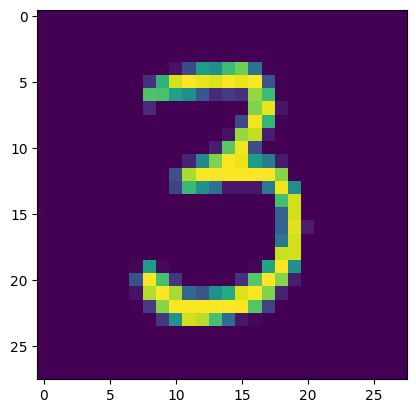

3


In [240]:
# displaying the image
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

In [241]:
Y_train.shape

(60000,)

In [242]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [243]:
X_train = X_train/255
X_test = X_test/255

In [244]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [245]:
model  = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [246]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [247]:
model.fit(X_train,Y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3583 - accuracy: 0.8935 - val_loss: 0.2004 - val_accuracy: 0.9410
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1617 - accuracy: 0.9526 - val_loss: 0.1540 - val_accuracy: 0.9562
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1194 - accuracy: 0.9638 - val_loss: 0.1333 - val_accuracy: 0.9612
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0974 - accuracy: 0.9702 - val_loss: 0.1374 - val_accuracy: 0.9601
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0809 - accuracy: 0.9752 - val_loss: 0.1332 - val_accuracy: 0.9601
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9784 - val_loss: 0.1284 - val_accuracy: 0.9656
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0614 - accuracy: 0.9803 - val_loss: 0.1185 - val_accuracy:

In [248]:
loss,accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1220 - accuracy: 0.9670


In [249]:
accuracy

0.9670000076293945

In [250]:
X_test.shape

(10000, 28, 28)

7


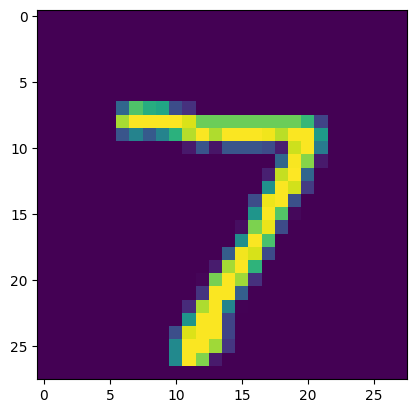

In [251]:
plt.imshow(X_test[0])
print(Y_test[0])

In [252]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [253]:
Y_pred.shape

(10000, 10)

In [254]:
Y_pred[0]

array([9.8429337e-05, 4.7803945e-03, 5.0161415e-01, 9.8745334e-01,
       1.3525448e-07, 2.8706499e-04, 2.3265329e-08, 9.9999958e-01,
       1.0401723e-03, 2.1325588e-01], dtype=float32)

In [255]:
np.argmax(Y_pred[0])

7

In [256]:
Y_pred_lables = [np.argmax(i) for i in Y_pred]
Y_pred_lables

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 7,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


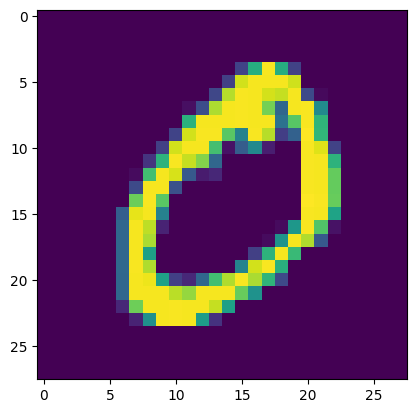

In [257]:
plt.imshow(X_train[1])
plt.show()

In [258]:
X_train[0].shape

(28, 28)

In [259]:
# confusion matrix
conf_mat = confusion_matrix(Y_test,Y_pred_lables)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    4,    1,    1,    4,    1,    2,    2,    4],
       [   0, 1127,    2,    2,    0,    1,    1,    0,    2,    0],
       [   3,    4, 1005,    3,    4,    2,    3,    5,    2,    1],
       [   0,    1,    8,  967,    1,   16,    0,    6,    5,    6],
       [   2,    0,    2,    0,  943,    0,    5,    4,    2,   24],
       [   2,    0,    0,    7,    2,  870,    4,    3,    3,    1],
       [   3,    2,    2,    1,    7,    4,  937,    0,    1,    1],
       [   0,    7,   14,    2,    1,    0,    0,  997,    2,    5],
       [   8,    0,    8,   11,    7,   14,    2,    2,  920,    2],
       [   2,    4,    2,    9,   10,    6,    0,   23,   10,  943]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

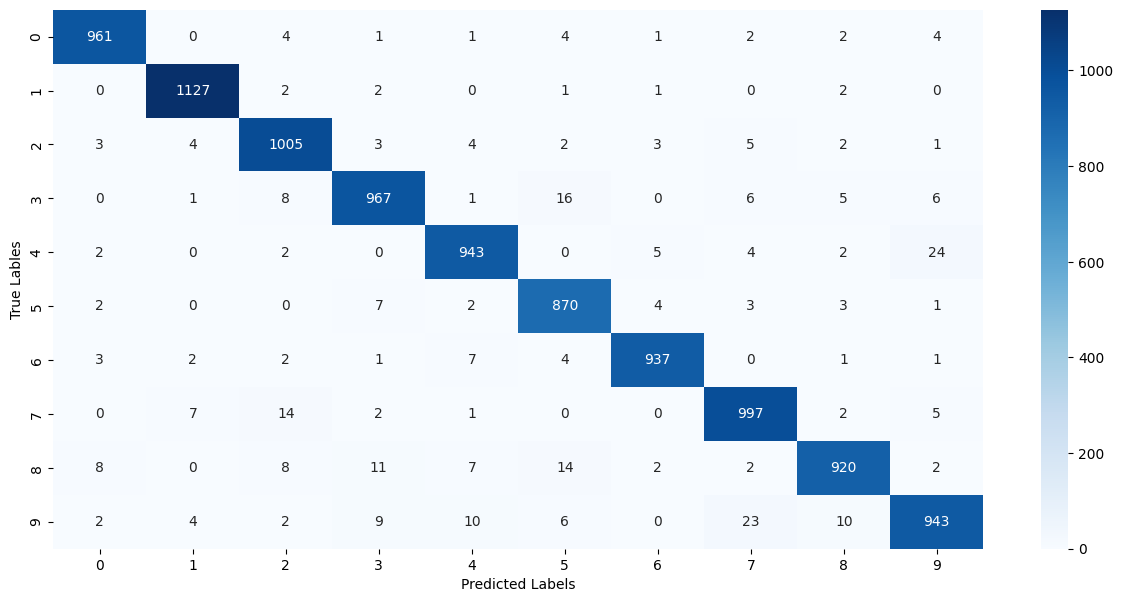

In [260]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Lables')
plt.xlabel("Predicted Labels")

In [261]:
# predicting image
input_image_path = '/content/seven.png'
input_image = cv2.imread(input_image_path)

In [262]:
type(input_image)

numpy.ndarray

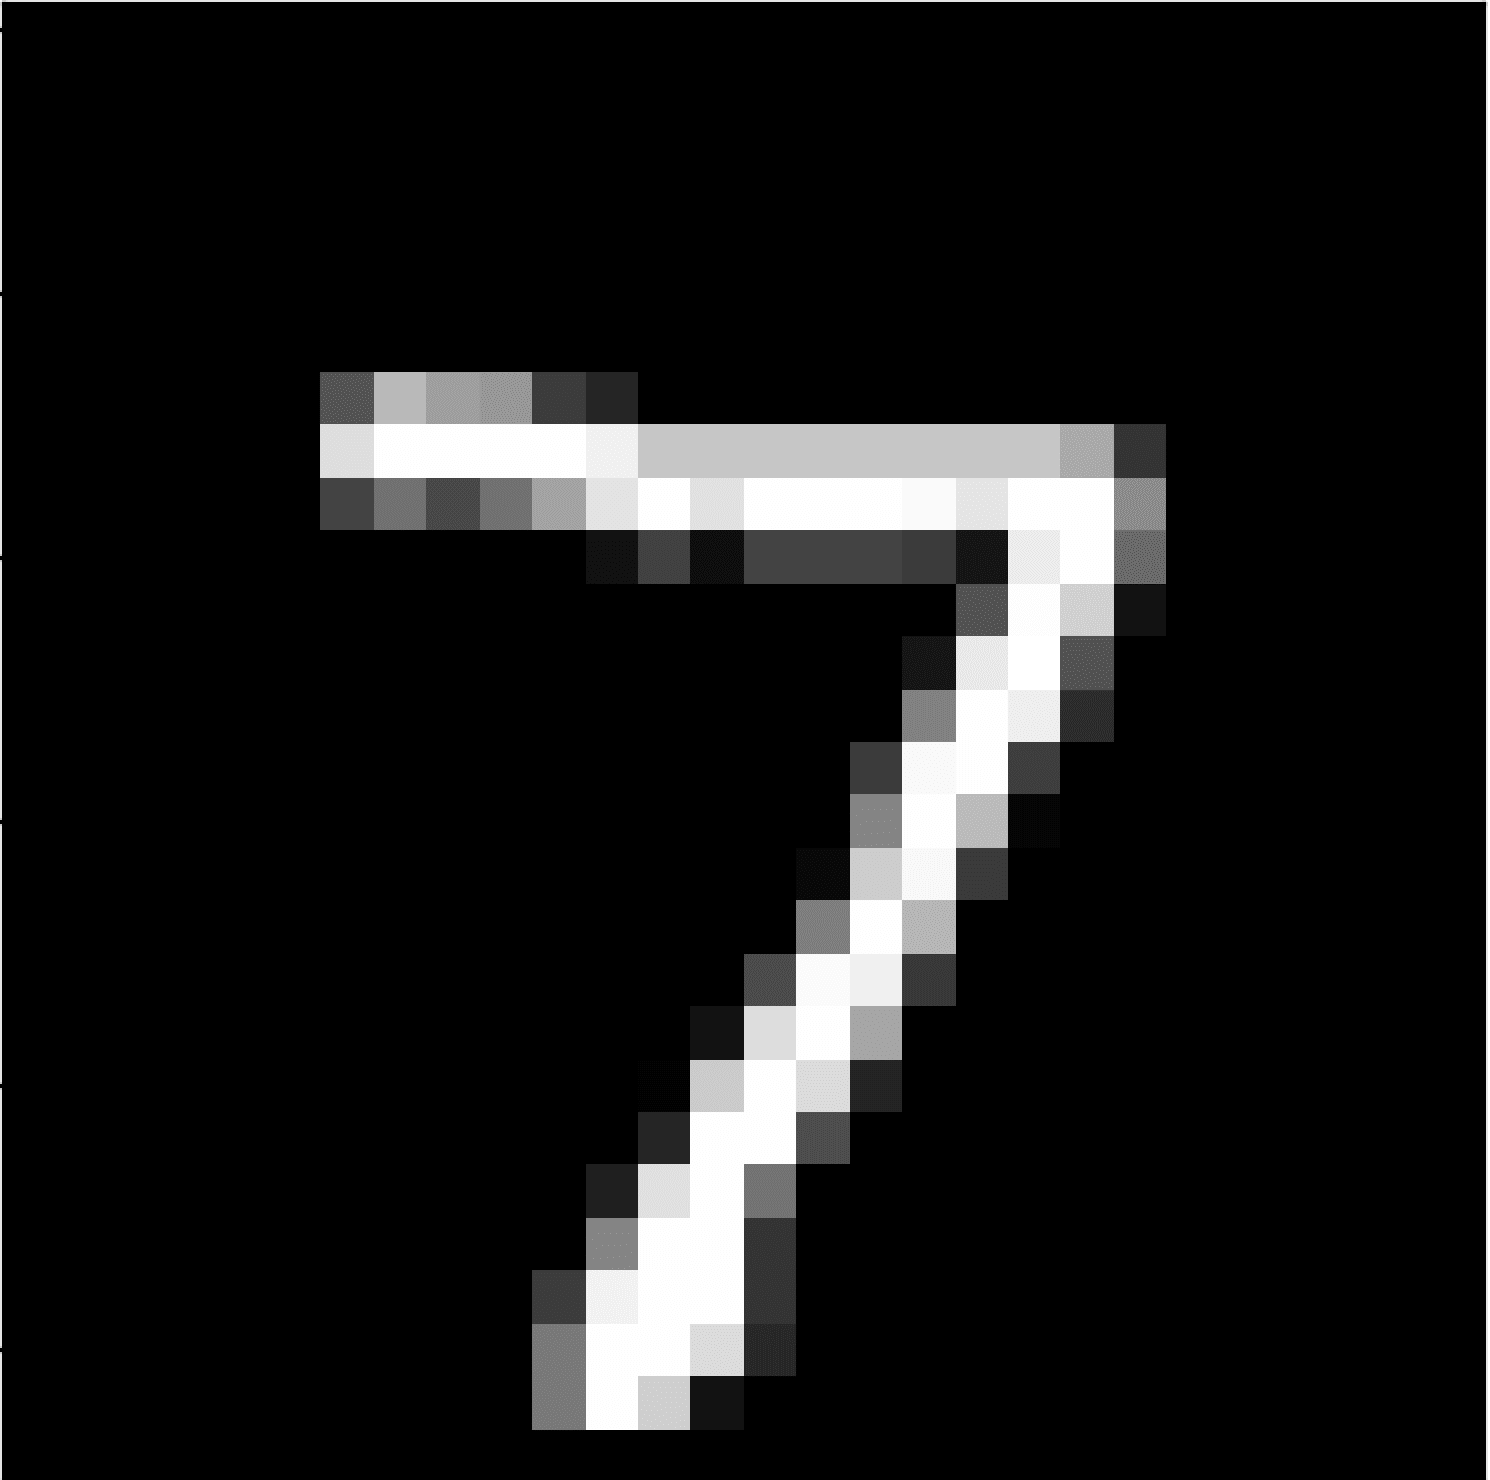

In [263]:
cv2_imshow(input_image)

In [264]:
input_image.shape

(1480, 1490, 3)

In [265]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [266]:
grayscale.shape

(1480, 1490)

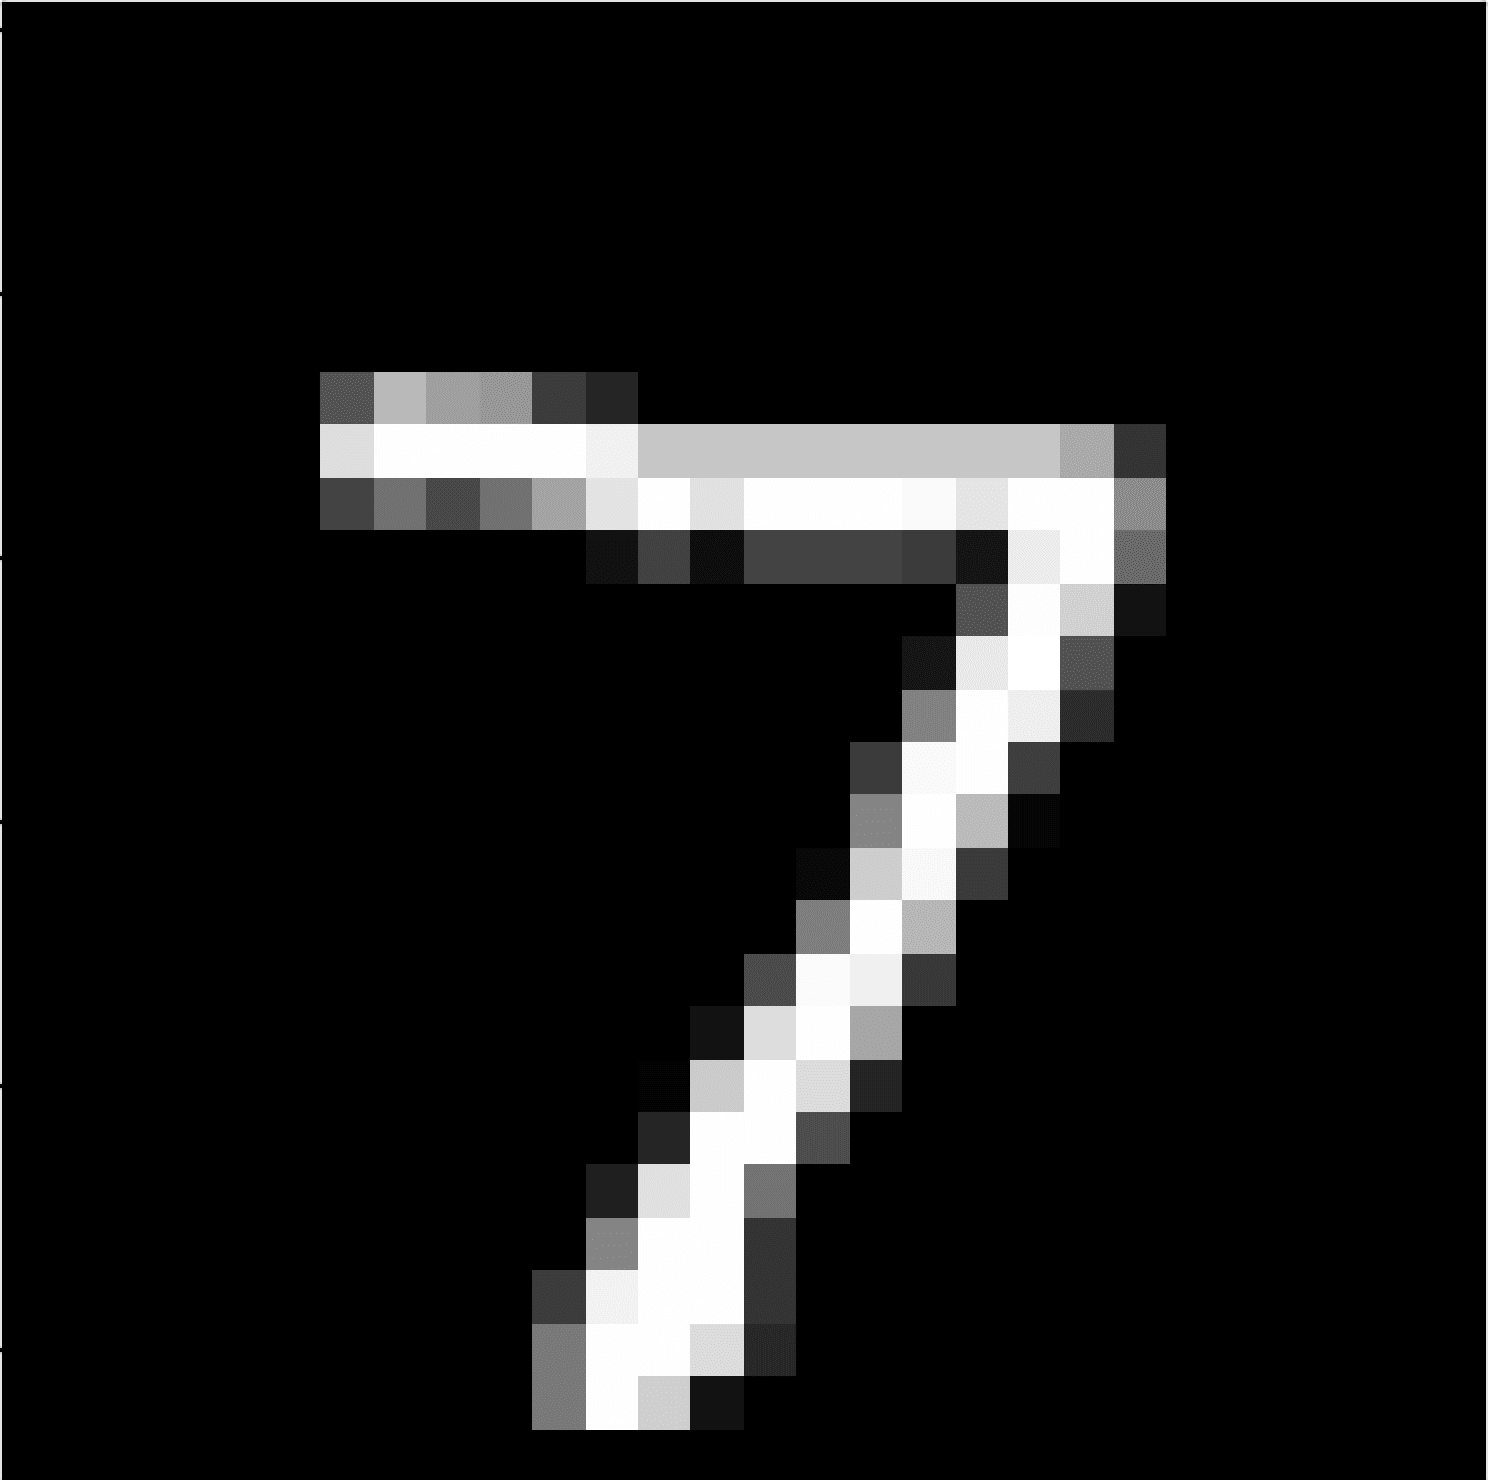

In [267]:
cv2_imshow(grayscale)

In [268]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [269]:
input_image_resize.shape

(28, 28)

In [270]:
cv2_imshow(input_image_resize)

In [271]:
input_image_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  80, 185, 157, 155,  59,  37,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 221, 255, 252, 255, 255, 244, 198,
        198, 198, 198, 198, 198, 198, 198, 167,  50,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 115,  68, 116, 160, 226, 254,
        224, 255, 254, 254, 250, 228, 252, 254, 135,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  63,
         12,  67,  67,  67,  59,  24, 234, 253, 104,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  80, 253, 206,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  20, 230, 255,  89,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 255, 231,  45,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 248, 255,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 132, 254, 185,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 203, 249,  59,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 123, 254, 178,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  79, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         18, 221, 255, 167,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        199, 251, 217,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        255, 254,  76,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 226,
        251, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 132, 253,
        253,  55,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [272]:
input_image_resize = input_image_resize/255

In [273]:
image_reshape = np.reshape(input_image_resize,[1,28,28])

In [274]:
predi = model.predict(image_reshape)
np.argmax(predi)

1/1 [==============================] - 0s 30ms/step


7

In [276]:
# predictive system
path = input('Enter path of the image')
input_image = cv2.imread(path)
print(type(input_image))
input_image_gray = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_reshape = cv2.resize(input_image_gray,(28,28))
cv2_imshow(input_reshape)
input_res = np.reshape(input_reshape,[1,28,28])
input_res = input_res/255
pred = model.predict(input_res)
print("The Predicted number is ",np.argmax(pred))

Enter path of the image/content/three.png
<class 'numpy.ndarray'>


1/1 [==============================] - 0s 34ms/step
The Predicted number is  3
